<a href="https://colab.research.google.com/github/philip-persan/desafio_6_curso_DNC/blob/main/Desafio_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importando as Bibliotécas e Carregando os Dados

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss, mean_squared_error, r2_score

# Visualizar modelos
import matplotlib.pyplot as plt
from yellowbrick.classifier import (
    classification_report,
    confusion_matrix,
    roc_auc
)

# Padronizar pandas como output das transformações/modelos
from sklearn import set_config
set_config(transform_output='pandas')

In [ ]:
dados = pd.read_csv('streaming_data.csv')

## Data Understanding

In [ ]:
dados.head()

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,49.0,Male,4700.0,3.0,Basic,NaN,3,NaN,0.0,a271aa56-bcfc-4f0a-91f7-b773de6b86a4
1,69.0,Female,6107.0,2.0,Standard,NaN,1,2.14,0.0,fe14b048-770b-4619-8ec6-485b0969ae31
2,44.0,Male,6374.0,3.0,Premium,1.0,1,1.91,1.0,0283dffd-6684-4a05-9c6f-c02098a6849d
3,26.0,Male,NaN,5.0,Basic,NaN,2,NaN,NaN,c316f2f5-3403-4a0a-82c2-c98e4b3379d2
4,18.0,NaN,1948.0,3.0,Basic,NaN,3,3.88,0.0,14879bcb-1977-4ad8-a7f9-6aa9bf7b872f


In [ ]:
# Verificando informaçãoes das colunas
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77884 entries, 0 to 77883
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     66607 non-null  float64
 1   Gender                  63368 non-null  object 
 2   Time_on_platform        56464 non-null  float64
 3   Devices_connected       52696 non-null  float64
 4   Subscription_type       52663 non-null  object 
 5   Num_streaming_services  9572 non-null   float64
 6   Num_active_profiles     77884 non-null  int64  
 7   Avg_rating              60614 non-null  float64
 8   Churned                 61148 non-null  float64
 9   User_id                 77884 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 5.9+ MB


In [ ]:
# Dados estatisticos do dataset
dados.describe()

,Age,Time_on_platform,Devices_connected,Num_streaming_services,Num_active_profiles,Avg_rating,Churned
count,66607.000000,56464.000000,52696.000000,9572.000000,77884.000000,60614.000000,61148.000000
mean,43.511072,4385.848505,2.995370,2.496239,3.002273,3.002252,0.243066
std,15.043158,2526.580859,1.414072,1.120700,1.413235,1.154963,0.428938
min,18.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,30.000000,2196.000000,2.000000,1.000000,2.000000,1.990000,0.000000
50%,43.000000,4384.000000,3.000000,2.000000,3.000000,3.010000,0.000000
75%,57.000000,6573.000000,4.000000,4.000000,4.000000,4.000000,0.000000
max,69.000000,8759.000000,5.000000,4.000000,5.000000,5.000000,1.000000


In [ ]:
# Verificando e somando dados nulos
dados.isna().sum()

Age                       11277
Gender                    14516
Time_on_platform          21420
Devices_connected         25188
Subscription_type         25221
Num_streaming_services    68312
Num_active_profiles           0
Avg_rating                17270
Churned                   16736
User_id                       0
dtype: int64

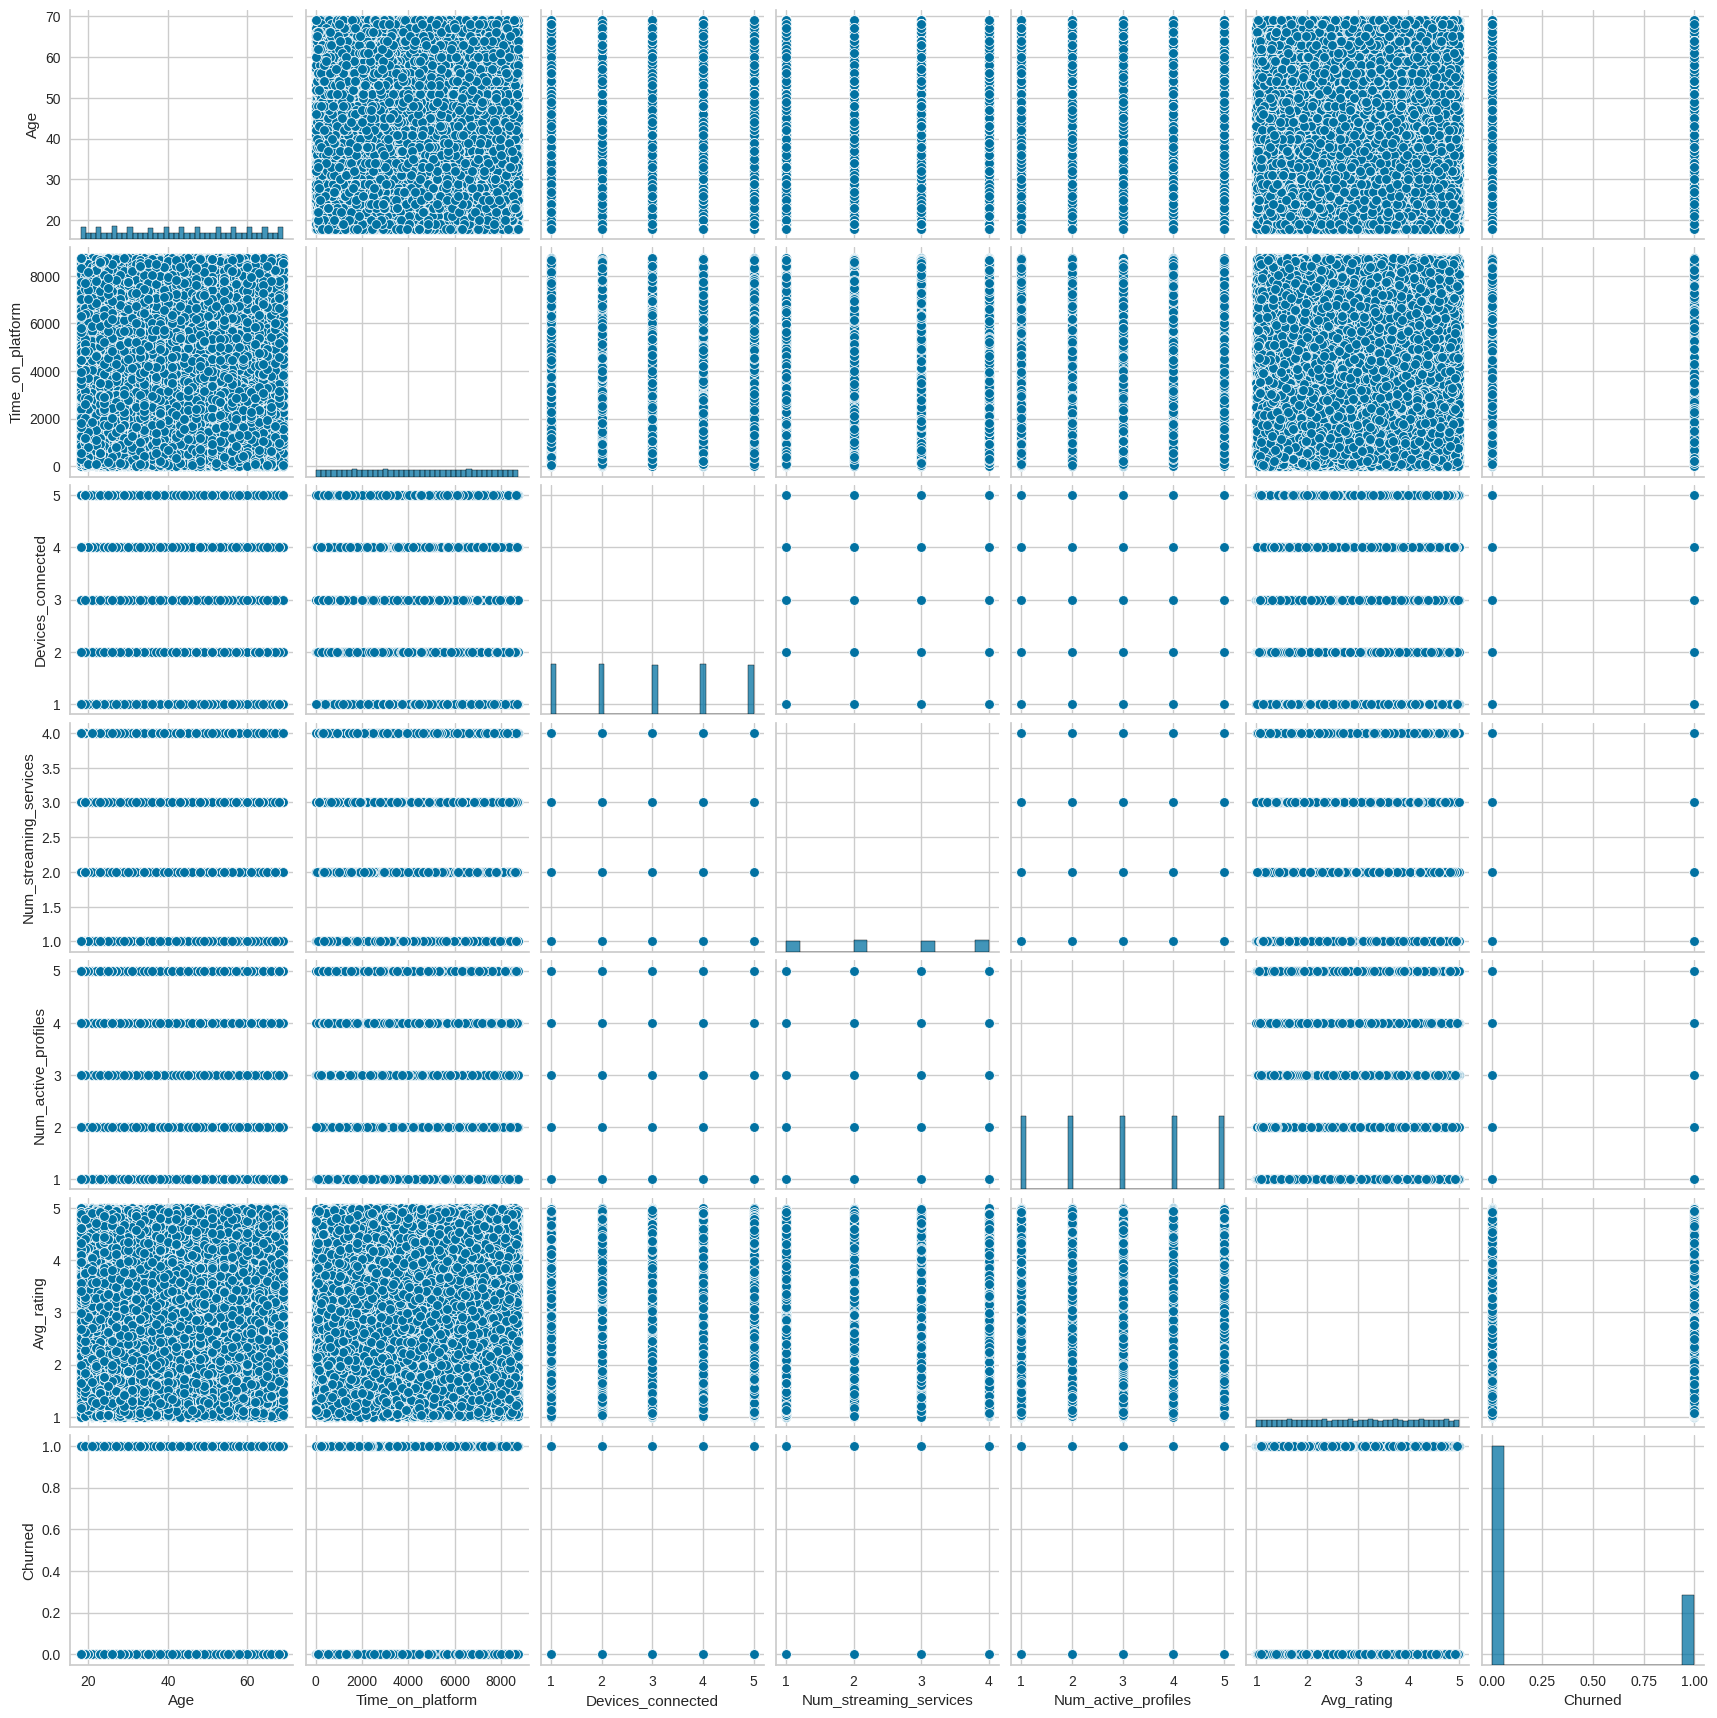

In [ ]:
# Pairplot para ver correlação dos dados e distribuição
sns.pairplot(dados)

## Data Preparation

In [ ]:
# Imputando dados nulos

dados['Time_on_platform'] = dados['Time_on_platform'].fillna(0)
dados['Num_streaming_services'] = dados['Num_streaming_services'].fillna(0)
dados['Churned'] = dados['Churned'].fillna(0)
dados['Avg_rating'] = dados['Avg_rating'].fillna(0)
dados['Devices_connected'] = dados['Devices_connected'].fillna(0)

dados.isna().sum()

Age                       11277
Gender                    14516
Time_on_platform              0
Devices_connected             0
Subscription_type         25221
Num_streaming_services        0
Num_active_profiles           0
Avg_rating                    0
Churned                       0
User_id                       0
dtype: int64

In [ ]:
# Dropando dados nulos restantes

dados = dados.dropna(axis=0)
dados.isna().sum()

Age                       0
Gender                    0
Time_on_platform          0
Devices_connected         0
Subscription_type         0
Num_streaming_services    0
Num_active_profiles       0
Avg_rating                0
Churned                   0
User_id                   0
dtype: int64

In [ ]:
# Convertendo o tipo de dados das colunas com os valores float para int

dados['Time_on_platform'] = dados['Time_on_platform'].astype(int)
dados['Devices_connected'] = dados['Devices_connected'].astype(int)
dados['Num_streaming_services'] = dados['Num_streaming_services'].astype(int)
dados['Num_active_profiles'] = dados['Num_active_profiles'].astype(int)
dados['Avg_rating'] = dados['Avg_rating'].astype(int)
dados['Churned'] = dados['Churned'].astype(int)
dados['Age'] = dados['Age'].astype(int)

dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36515 entries, 0 to 77883
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     36515 non-null  int64 
 1   Gender                  36515 non-null  object
 2   Time_on_platform        36515 non-null  int64 
 3   Devices_connected       36515 non-null  int64 
 4   Subscription_type       36515 non-null  object
 5   Num_streaming_services  36515 non-null  int64 
 6   Num_active_profiles     36515 non-null  int64 
 7   Avg_rating              36515 non-null  int64 
 8   Churned                 36515 non-null  int64 
 9   User_id                 36515 non-null  object
dtypes: int64(7), object(3)
memory usage: 3.1+ MB


<ipython-input-10-67fbc35eaa17>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados['Time_on_platform'] = dados['Time_on_platform'].astype(int)
<ipython-input-10-67fbc35eaa17>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados['Devices_connected'] = dados['Devices_connected'].astype(int)
<ipython-input-10-67fbc35eaa17>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [ ]:
# Subistituindo os valores 0 e 1 da coluna Churned

# dados['Churned'] = dados['Churned'].replace(0, 'No')
# dados['Churned'] = dados['Churned'].replace(1, 'Yes')
# dados['Churned']

0         No
1         No
2        Yes
3         No
5         No
        ... 
77879     No
77880     No
77881    Yes
77882     No
77883     No
Name: Churned, Length: 36515, dtype: object

## Inciando o Modeling

In [ ]:
# Definindo os valores de X e y

X = dados.drop(['Churned', 'User_id'], axis=1)
y = dados['Churned']

In [ ]:
# Separando as colunas numericas, categoricas e o target

CATEGORICAL_FEATURES = [
    'Gender', 'Subscription_type'
]

NUMERIC_FEATURES = [
    'Age', 'Time_on_platform', 'Devices_connected',
    'Num_streaming_services', 'Num_active_profiles',
    'Avg_rating'
]

TARGET = 'Churned'

FEATURES = NUMERIC_FEATURES + CATEGORICAL_FEATURES

### Definindo os valores de Treino e Teste

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### Definindo MinMaxScaler para valores nummericos e OneHotEncoder para os valores categoricos

In [ ]:
num_preprocessor = MinMaxScaler()

categoriacal_preprocessor = OneHotEncoder(handle_unknown='ignore', sparse_output=False, dtype=np.int8)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_preprocessor, NUMERIC_FEATURES),
        ('cat', categoriacal_preprocessor, CATEGORICAL_FEATURES)
    ]
)

## Modeling - Regressão Logistica

In [ ]:
# Criando a Pipeline do modelo de Regressão Logistica

pipeline_log = Pipeline([
    ('preprocessor', preprocessor),
    ('log', LogisticRegression(max_iter=1000, class_weight="balanced"))
])
pipeline_log

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['Age', 'Time_on_platform',
                                                   'Devices_connected',
                                                   'Num_streaming_services',
                                                   'Num_active_profiles',
                                                   'Avg_rating']),
                                                 ('cat',
                                                  OneHotEncoder(dtype=<class 'numpy.int8'>,
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Gender',
                                                   'Subscription_type'])])),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

### Treinando o modelo RL

In [ ]:
pipeline_log.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['Age', 'Time_on_platform',
                                                   'Devices_connected',
                                                   'Num_streaming_services',
                                                   'Num_active_profiles',
                                                   'Avg_rating']),
                                                 ('cat',
                                                  OneHotEncoder(dtype=<class 'numpy.int8'>,
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Gender',
                                                   'Subscription_type'])])),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

### Prevendo valores com o modelo RL

In [ ]:
y_pred = pipeline_log.predict(X_test)
y_prob = pipeline_log.predict_proba(X_test)[:, 1]

### Avaliando o modelo RL

In [ ]:
# Métricas de classificação
print("Acurácia:", accuracy_score(y_test, y_pred))
print("Precisão:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_prob))
print("Log Loss:", log_loss(y_test, y_prob))

Acurácia: 0.5188958264870194
Precisão: 0.19165129151291513
Recall: 0.48370197904540163
F1 Score: 0.2745292368681863
AUC-ROC: 0.5090015801009385
Log Loss: 0.6932447440723943


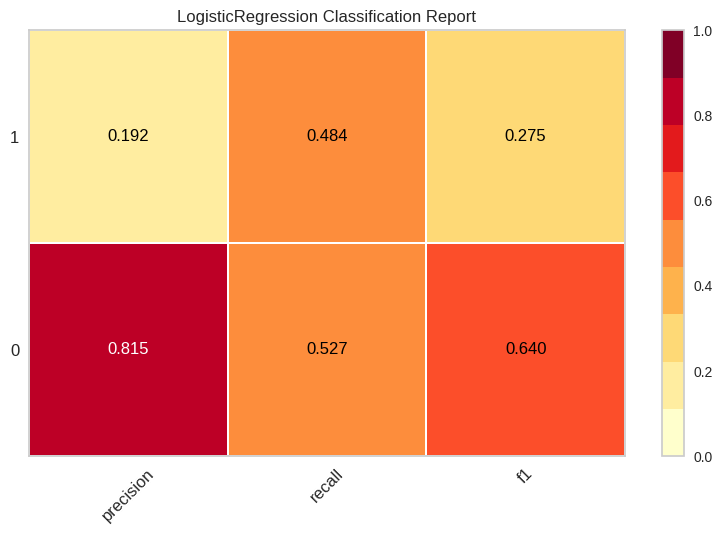

ClassificationReport(ax=<Axes: title={'center': 'LogisticRegression Classification Report'}>,
                     classes=array([0, 1]),
                     cmap=<matplotlib.colors.ListedColormap object at 0x7bd83f65b940>,
                     estimator=Pipeline(steps=[('preprocessor',
                                                ColumnTransformer(transformers=[('num',
                                                                                 MinMaxScaler(),
                                                                                 ['Age',
                                                                                  'Time_on_platform',
                                                                                  'Devices_connected',
                                                                                  'Num_streaming_services',
                                                                                  'Num_active_profiles',
                                                                                  'Avg_rating']),
                                                                                ('cat',
                                                                                 OneHotEncoder(dtype=<class 'numpy.int8'>,
                                                                                               handle_unknown='ignore',
                                                                                               sparse_output=False),
                                                                                 ['Gender',
                                                                                  'Subscription_type'])])),
                                               ('log',
                                                LogisticRegression(class_weight='balanced',
                                                                   max_iter=1000))]))

In [ ]:
classification_report(pipeline_log, X_train, y_train, X_test, y_test, classes=pipeline_log.classes_)

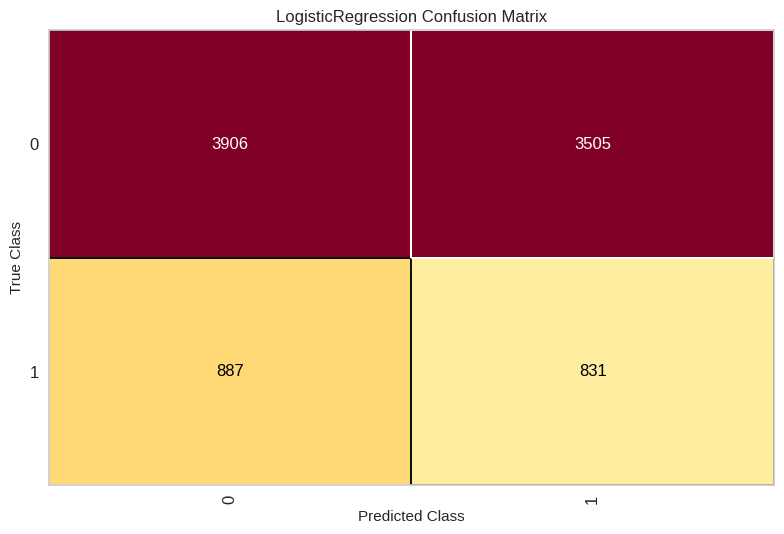

In [ ]:
confusion_matrix(pipeline_log, X_train, y_train, X_test, y_test);

### Tunning do modelo de RL

In [ ]:
# Definir a grade de parâmetros
param_grid = {
    'log__C': [0.001, 0.01, 0.1, 1, 10, 100],  # Parâmetro de regularização
    'log__penalty': ['l2']  # Tipo de regularização
}

# Criar o objeto GridSearchCV
grid_search_rl = GridSearchCV(pipeline_log, param_grid, cv=5, scoring='accuracy')

### Fit do modelo RL Tunned

In [ ]:
# Ajustar o GridSearchCV aos dados de treino
grid_search_rl.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         MinMaxScaler(),
                                                                         ['Age',
                                                                          'Time_on_platform',
                                                                          'Devices_connected',
                                                                          'Num_streaming_services',
                                                                          'Num_active_profiles',
                                                                          'Avg_rating']),
                                                                        ('cat',
                                                                         OneHotEncoder(dtype=<class 'numpy.int8'>,
                                                                                       handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['Gender',
                                                                          'Subscription_type'])])),
                                       ('log',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=1000))]),
             param_grid={'log__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'log__penalty': ['l2']},
             scoring='accuracy')

### Predict do modelo RL Tunned

In [ ]:
# Melhor modelo encontrado pelo GridSearchCV
best_model_rl = grid_search_rl.best_estimator_
print(grid_search_rl.best_params_)

{'log__C': 10, 'log__penalty': 'l2'}


In [ ]:
# Avaliar o melhor modelo nos dados de teste
y_pred = best_model_rl.predict(X_test)
y_prob = best_model_rl.predict_proba(X_test)[:, 1]

### Avaliação do modelo RL Tunned

In [ ]:
# Métricas de classificação
print("Acurácia:", accuracy_score(y_test, y_pred))
print("Precisão:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_prob))
print("Log Loss:", log_loss(y_test, y_prob))

Acurácia: 0.5187862854639063
Precisão: 0.19160710168319114
Recall: 0.48370197904540163
F1 Score: 0.2744838976052849
AUC-ROC: 0.5089956894770995
Log Loss: 0.6932449324381972


## Modeling - Random Forest

In [ ]:
# Criando a Pipeline do modelo Random Forest

pipeline_rand_tree = Pipeline([
    ('preprocessor', preprocessor),
    ('rf', RandomForestRegressor(random_state=42))
])
pipeline_rand_tree

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['Age', 'Time_on_platform',
                                                   'Devices_connected',
                                                   'Num_streaming_services',
                                                   'Num_active_profiles',
                                                   'Avg_rating']),
                                                 ('cat',
                                                  OneHotEncoder(dtype=<class 'numpy.int8'>,
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Gender',
                                                   'Subscription_type'])])),
                ('rf', RandomForestRegressor(random_state=42))])

### Treinando o modelo RF

In [ ]:
pipeline_rand_tree.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['Age', 'Time_on_platform',
                                                   'Devices_connected',
                                                   'Num_streaming_services',
                                                   'Num_active_profiles',
                                                   'Avg_rating']),
                                                 ('cat',
                                                  OneHotEncoder(dtype=<class 'numpy.int8'>,
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Gender',
                                                   'Subscription_type'])])),
                ('rf', RandomForestRegressor(random_state=42))])

### Predict do modelo RF

In [ ]:
y_pred = pipeline_rand_tree.predict(X_test)

### Avaliação do modelo RF

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("R²: ", r2)
print("RMSE: ", rmse)

R²:  0.10431845451368182
RMSE:  0.36991640551861954


### Tunning do modelo RF

In [ ]:
param_grid = {
    'rf__n_estimators': [100, 200],
    'rf__max_depth': [None, 10, 20],
    'rf__min_samples_split': [2, 5],
    'rf__min_samples_leaf': [1, 2],
    'rf__max_features': [1.0, 'sqrt'],
    'rf__bootstrap': [True],
    'rf__random_state': [42]
}

# Configurando o GridSearchCV
grid_search_rf = GridSearchCV(pipeline_rand_tree, param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

# Ajustando o GridSearchCV aos dados
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         MinMaxScaler(),
                                                                         ['Age',
                                                                          'Time_on_platform',
                                                                          'Devices_connected',
                                                                          'Num_streaming_services',
                                                                          'Num_active_profiles',
                                                                          'Avg_rating']),
                                                                        ('cat',
                                                                         OneHotEncoder(dtype=<class 'numpy.int8'>,
                                                                                       handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['Gender',
                                                                          'Subscription_type'])])),
                                       ('rf',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'rf__bootstrap': [True],
                         'rf__max_depth': [None, 10, 20],
                         'rf__max_features': [1.0, 'sqrt'],
                         'rf__min_samples_leaf': [1, 2],
                         'rf__min_samples_split': [2, 5],
                         'rf__n_estimators': [100, 200],
                         'rf__random_state': [42]},
             scoring='neg_mean_squared_error')

### Melhores Parametros do RF Tunned

In [ ]:
# Melhor modelo encontrado pelo GridSearchCV
best_model_rf = grid_search_rf.best_estimator_
print(grid_search_rf.best_params_)

{'rf__bootstrap': True, 'rf__max_depth': 20, 'rf__max_features': 1.0, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 2, 'rf__n_estimators': 200, 'rf__random_state': 42}


### Predict do Modelo RF Tunned

In [ ]:
# Avaliar o melhor modelo nos dados de teste
y_pred = best_model_rf.predict(X_test)

### Avaliação do Modelo RF Tunned

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("R²: ", r2)
print("RMSE: ", rmse)

R²:  0.09763751314435964
RMSE:  0.37129345653456003
